In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import ast

# setting plots theme
sns.set_theme(style="ticks")

# loading data
data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(func=(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills))

# What is the Most Optimal Skill to learn ?
#### Methodology 
1. Group skills to determine median salary and likelyhood of being posted
2. Visualize median salary Vs Percent Skill Demand
3. (Opional) Determine if certain technologies are more prevelant

In [74]:
df["job_title_short"].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [75]:
df_skills = df[df["job_title_short"].isin(["Data Scientist", "Senior Data Scientist"])].dropna(subset=["salary_year_avg"]).copy()

In [76]:
df_skills_exploded = df_skills.explode(column=["job_skills"])

In [77]:
df_skills_total =  df_skills_exploded["job_title_short"].value_counts().reset_index()
df_skills_total.head(2)

,job_title_short,count
0,Data Scientist,30685
1,Senior Data Scientist,9034


In [78]:
df_skills_gp = df_skills_exploded.groupby(["job_skills"])["salary_year_avg"].agg(["median", "count"]).sort_values(by="count", ascending=False).reset_index()
df_skills_gp.head()

,job_skills,median,count
0,python,137500.0,5616
1,sql,139500.0,4173
2,r,131900.0,3177
3,tableau,128050.0,1606
4,sas,122000.0,1524


In [79]:
df_skills_gp["skill_pecent"] = (df_skills_gp["count"] / len(df_skills)) * 100

In [80]:
# df_skills_gp.head(10)

In [81]:
# Seperating job_type_skills data
job_type_skills = df_skills["job_type_skills"].values

# it collect skill types
all_keys = set()
count = 0
for item in job_type_skills:
    if pd.notna(item):
        item = ast.literal_eval(item)
        all_keys =  all_keys.union(set(item.keys()))

In [82]:
# It classify the skills
skill_type = dict().fromkeys(all_keys, list())
for item in job_type_skills[:3]:
    if pd.notna(item):
        item = ast.literal_eval(item)
        for k,v in item.items():
            if v not in skill_type[k]:
                skill_type[k].extend(v)

In [83]:
df_skill_type = pd.DataFrame(skill_type).melt()
df_skill_type = df_skill_type.rename(columns={"variable":"technology", "value":"job_skills"})

In [84]:
df_skills_gp.head(5)

,job_skills,median,count,skill_pecent
0,python,137500.0,5616,73.778245
1,sql,139500.0,4173,54.821335
2,r,131900.0,3177,41.736731
3,tableau,128050.0,1606,21.098266
4,sas,122000.0,1524,20.021019


In [85]:
# df_skills_gp = 
df_skill_type.head(5)

,technology,job_skills
0,os,excel
1,os,gdpr
2,os,sql
3,os,r
4,os,python


In [86]:
df_skills_final = pd.merge(left=df_skills_gp, right=df_skill_type, left_on="job_skills", right_on="job_skills", how="inner").drop_duplicates()

In [87]:
df_skills_final

,job_skills,median,count,skill_pecent,technology
0,python,137500.0,5616,73.778245,os
2,python,137500.0,5616,73.778245,sync
4,python,137500.0,5616,73.778245,webframeworks
6,python,137500.0,5616,73.778245,other
8,python,137500.0,5616,73.778245,libraries
...,...,...,...,...,...
125,t-sql,130000.0,29,0.380977,async
126,t-sql,130000.0,29,0.380977,databases
127,t-sql,130000.0,29,0.380977,programming
128,t-sql,130000.0,29,0.380977,cloud


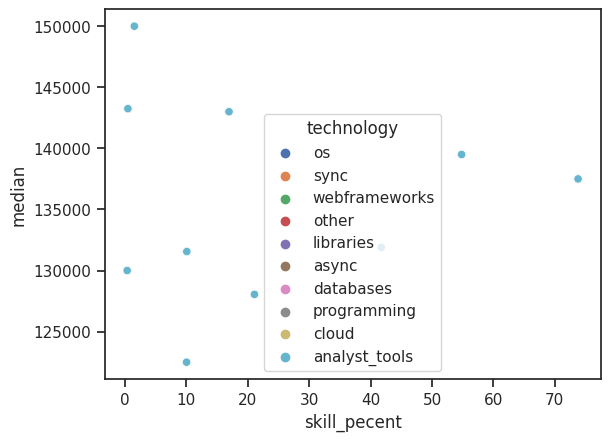

In [89]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_skills_final, x="skill_pecent", y="median", hue="technology", ax=ax)
# ax.text()
plt.show()

In [71]:
df_skills_final[""]

,job_skills,median,count,skill_pecent,technology
0,sql,120000.0,12951,58.860155,os
2,sql,120000.0,12951,58.860155,sync
4,sql,120000.0,12951,58.860155,webframeworks
6,sql,120000.0,12951,58.860155,other
8,sql,120000.0,12951,58.860155,libraries
...,...,...,...,...,...
145,mariadb,122500.0,29,0.131800,async
146,mariadb,122500.0,29,0.131800,databases
147,mariadb,122500.0,29,0.131800,programming
148,mariadb,122500.0,29,0.131800,cloud
